<a href="https://colab.research.google.com/github/jurados/NotesPytorch/blob/main/%5B04%5D_PyTorch_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split
# Create DataLoader usint batches
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transform
from torchvision.datasets import MNIST

from tqdm.auto import tqdm

In [2]:
# Download training dataset
train_dataset = MNIST(root='./', train=True, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 8653610.93it/s] 


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1832030.58it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14358420.96it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4238159.90it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train

In [4]:
len(train_dataset)

60000

In [5]:
# Download training dataset
test_dataset = MNIST(root='./', train=False, download=True)
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test

In [6]:
len(test_dataset)

10000

(-0.5, 27.5, 27.5, -0.5)

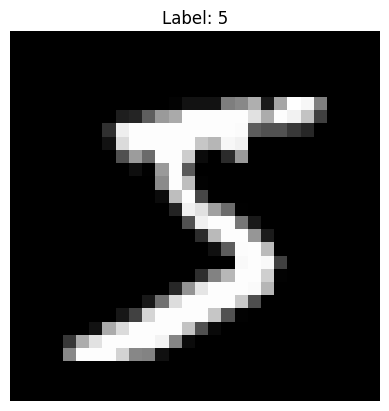

In [7]:
img, label = train_dataset[0]
plt.imshow(img, cmap='gray')
plt.title(f'Label: {label}')
plt.axis(False)

In [9]:
# MNIST dataset (images and labels)
train_dataset = MNIST(root='./', train=True, transform=transform.ToTensor())

In [10]:
img, label = train_dataset[0]
img.shape, label

(torch.Size([1, 28, 28]), 5)

In [11]:
28*28*5

3920

In [12]:
print(img[:,10:15,10:15])
print(torch.max(img), torch.min(img))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


(-0.5, 4.5, 4.5, -0.5)

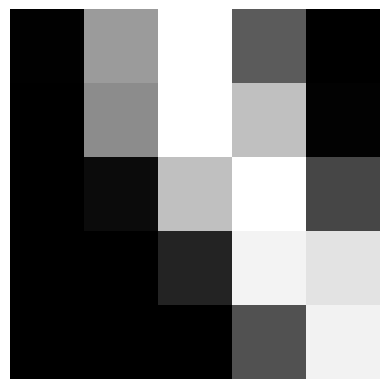

In [13]:
plt.imshow(img[0,10:15,10:15],cmap='gray')
plt.axis(False)

# Training and validation datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set:** Used to train the model, i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Valdation set:** Used to evaluate the model while training, adjust hyperparameters (leraning rate, etc.) and pick the best version of the model.
3. **Test set:** Used to compare different models, or different types of medelling approaches, and report the final accuracy of the model.

We can divide using `random_split` method in PyTorch.

In [15]:
train_dataset, validation_dataset = random_split(dataset=train_dataset, lengths= [50_000,10_000])
len(train_dataset), len(validation_dataset)

(50000, 10000)

In [18]:
# Create DataLoader usint batches
batch_size = 128

train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(dataset=validation_dataset,batch_size=batch_size)

# Model

- Since `nn.Linear` expects the each training example to be a vector, each 1x28x28 image tensor needs to be flattened out into a vector of size 784 (28*28), before being passed into the model.

In [20]:
input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(in_features = input_size, out_features = num_classes)

In [21]:
model.weight.shape, model.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

In [22]:
for imgs, labels in train_dataloader:
  print(labels)
  print(imgs.shape)
  outputs = model(imgs)

tensor([8, 5, 2, 7, 7, 7, 5, 3, 5, 5, 3, 8, 9, 4, 4, 9, 9, 0, 5, 7, 5, 0, 6, 8,
        8, 6, 2, 1, 6, 1, 5, 5, 6, 4, 2, 9, 1, 8, 5, 8, 3, 5, 0, 4, 9, 2, 4, 4,
        6, 6, 4, 8, 9, 4, 5, 6, 6, 8, 9, 7, 7, 1, 0, 0, 7, 3, 7, 4, 8, 6, 9, 3,
        0, 3, 5, 5, 6, 0, 7, 4, 6, 9, 3, 5, 0, 7, 9, 2, 2, 9, 1, 3, 7, 4, 9, 2,
        2, 6, 5, 8, 3, 7, 5, 1, 9, 5, 4, 7, 9, 6, 2, 0, 4, 1, 6, 7, 5, 5, 9, 1,
        3, 1, 5, 0, 5, 9, 3, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [23]:
class MNISTModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features = input_size, out_features = num_classes)

  def forward(self,x):
    x = x.reshape(-1,784)
    out = self.linear(x)
    return out

model_v1 = MNISTModelV1()
model_v1

MNISTModelV1(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [24]:
list(model_v1.parameters())

[Parameter containing:
 tensor([[ 0.0070, -0.0322, -0.0284,  ...,  0.0131,  0.0253,  0.0329],
         [ 0.0051, -0.0044, -0.0032,  ..., -0.0114,  0.0113,  0.0034],
         [ 0.0175, -0.0209, -0.0103,  ..., -0.0093,  0.0274, -0.0086],
         ...,
         [-0.0006,  0.0066,  0.0041,  ..., -0.0022,  0.0094,  0.0033],
         [-0.0043, -0.0177,  0.0080,  ..., -0.0322, -0.0147,  0.0071],
         [-0.0222, -0.0356,  0.0101,  ...,  0.0210,  0.0246,  0.0196]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0154,  0.0174,  0.0077,  0.0219, -0.0072, -0.0147, -0.0231, -0.0038,
          0.0264,  0.0014], requires_grad=True)]

In [25]:
for img, labels in train_dataloader:
  print(f'Image shape: {img.shape}')
  outputs = model_v1(img)

print(f'Output shape: {outputs.shape}')
print(f'Sample outputs: \n {outputs[:2].data}')

Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 28, 28])
Image shape: torch.Size([128, 1, 2

In [27]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print(f"Sample probabilities:\n {probs[:2].data}")

# Add up the probabilities of an output row
print(f"Sum: {torch.sum(probs[0]).item()}")

Sample probabilities:
 tensor([[0.0982, 0.1103, 0.0820, 0.0831, 0.0954, 0.0807, 0.0866, 0.1618, 0.1204,
         0.0816],
        [0.1052, 0.1273, 0.1211, 0.0649, 0.0753, 0.0845, 0.0729, 0.1368, 0.1071,
         0.1050]])
Sum: 1.0


In [28]:
max_probs, preds = torch.max(probs, dim=1)
preds, max_probs

(tensor([7, 7, 2, 1, 7, 1, 8, 1, 1, 1, 2, 1, 7, 7, 1, 2, 7, 7, 7, 1, 7, 1, 1, 2,
         1, 1, 7, 1, 6, 1, 1, 1, 8, 0, 1, 1, 1, 1, 7, 8, 1, 1, 7, 3, 1, 1, 7, 2,
         7, 1, 1, 2, 7, 1, 2, 7, 7, 2, 1, 7, 7, 1, 1, 1, 1, 1, 3, 7, 1, 9, 1, 7,
         1, 7, 1, 1, 7, 1, 7, 1]),
 tensor([0.1618, 0.1368, 0.1224, 0.1408, 0.1448, 0.1595, 0.1247, 0.1253, 0.1314,
         0.1452, 0.1139, 0.1713, 0.1141, 0.1377, 0.1358, 0.1280, 0.1553, 0.1227,
         0.1464, 0.1320, 0.1758, 0.1734, 0.1249, 0.1162, 0.1479, 0.1563, 0.1446,
         0.1295, 0.1319, 0.1427, 0.1174, 0.1349, 0.1194, 0.1380, 0.1311, 0.1333,
         0.1278, 0.1179, 0.1436, 0.1261, 0.1778, 0.1384, 0.1415, 0.1219, 0.1889,
         0.1529, 0.1693, 0.1204, 0.1247, 0.1407, 0.1583, 0.1249, 0.1496, 0.1206,
         0.1192, 0.1236, 0.1274, 0.1353, 0.1853, 0.1509, 0.1281, 0.1501, 0.1419,
         0.1528, 0.1787, 0.1327, 0.1174, 0.1524, 0.1155, 0.1125, 0.1618, 0.1332,
         0.1561, 0.1653, 0.1499, 0.1317, 0.1631, 0.1387, 0.1382, 0.1210],


# Evaluation metrics and loss function

In [29]:
def accuracy(outputs, labels):
  _ , preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [30]:
accuracy(outputs, labels)

tensor(0.0375)

In [31]:
# Use cross-entropy
loss_fn = F.cross_entropy

In [32]:
loss = loss_fn(outputs, labels)
loss

tensor(2.3548, grad_fn=<NllLossBackward0>)

# Training the model

The pseudocode of this process is:

```
for epoch in range(num_epochs):
  # Training phase
  for batch in train_dataloader:
    # Generate predictions
    # Calculate loss
    # Compute gradients
    # Update weights
    # Reset gradients

  # Validation phase
  for batch in val_dataloader:
    # Generate predictions
    # Calculate loss
    # Calculate metrics (accuracy etc.)

  # Calculate average validation loss & metrics

  # Log epochs, loss & metrics for inspection
```

In [50]:
class MNISTModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features = input_size, out_features = num_classes)

  def forward(self,x):
    x = x.reshape(-1,784)
    out = self.linear(x)
    return out

  def training_step(self, batch):
    imgs, labels = batch
    out = self(imgs)                    # Generate predictions
    loss = F.cross_entropy(out, labels) # Calculate loss
    return loss

  def validation_step(self, batch):
    imgs, labels = batch
    out = self(imgs)                    # Generate predictions
    loss = F.cross_entropy(out, labels) # Calculate loss
    acc = accuracy(out, labels)         # Calculate accuracy
    return {'val_loss':loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean() # Combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()    # Combine accuracies
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
      print(f"Epoch {epoch+1}: val_loss = {result['val_loss']:.4f}, val_acc = {result['val_acc']:.4f}")

model_v2 = MNISTModelV2()
model_v2

MNISTModelV2(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

Now we'll define an `evaluate` function, which will perform the validation phase, and a `fit` function which will perform the entire training preocess.

In [45]:
def evaluate(model, val_dataloader):
  outputs = [model.validation_step(batch) for batch in val_dataloader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_dataloader, val_dataloader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in tqdm(range(epochs)):
    # Training phase
    for batch in train_dataloader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    #Validation phase
    result = evaluate(model, val_dataloader)
    model.epoch_end(epoch,result)
    history.append(result)

  return history

In [46]:
result_0 = evaluate(model_v2, val_dataloader)
result_0

{'val_loss': 2.3378281593322754, 'val_acc': 0.10779272019863129}

In [51]:
history_1 = fit(epochs=5, lr=0.01, model=model_v2, train_dataloader=train_dataloader, val_dataloader=val_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1: val_loss = 0.8912, val_acc = 0.8318
Epoch 2: val_loss = 0.6699, val_acc = 0.8536
Epoch 3: val_loss = 0.5794, val_acc = 0.8649
Epoch 4: val_loss = 0.5282, val_acc = 0.8733
Epoch 5: val_loss = 0.4947, val_acc = 0.8784


In [52]:
history_2 = fit(5, 0.001, model_v2, train_dataloader, val_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1: val_loss = 0.4920, val_acc = 0.8794
Epoch 2: val_loss = 0.4894, val_acc = 0.8798
Epoch 3: val_loss = 0.4868, val_acc = 0.8801
Epoch 4: val_loss = 0.4843, val_acc = 0.8811
Epoch 5: val_loss = 0.4819, val_acc = 0.8816


In [54]:
history_3 = fit(5, 0.001, model_v2, train_dataloader, val_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1: val_loss = 0.4796, val_acc = 0.8817
Epoch 2: val_loss = 0.4773, val_acc = 0.8820
Epoch 3: val_loss = 0.4751, val_acc = 0.8827
Epoch 4: val_loss = 0.4730, val_acc = 0.8831
Epoch 5: val_loss = 0.4709, val_acc = 0.8835


In [55]:
history_4 = fit(5, 0.001, model_v2, train_dataloader, val_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1: val_loss = 0.4688, val_acc = 0.8838
Epoch 2: val_loss = 0.4668, val_acc = 0.8840
Epoch 3: val_loss = 0.4649, val_acc = 0.8842
Epoch 4: val_loss = 0.4631, val_acc = 0.8845
Epoch 5: val_loss = 0.4612, val_acc = 0.8845


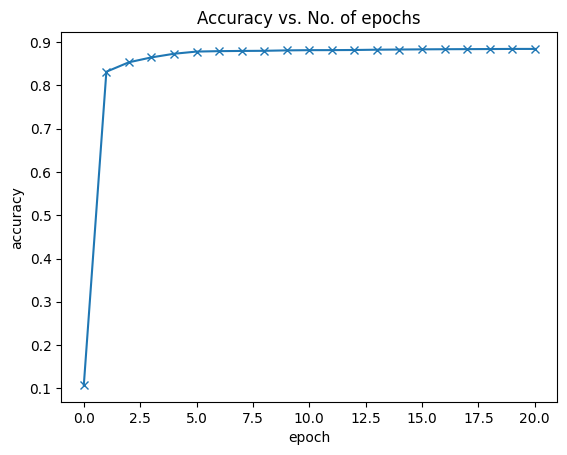

In [56]:
history = [result_0] + histoy_1 + history_2 + history_3 + history_4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');